In [422]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score, classification_report, precision_recall_curve


In [423]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [424]:
# Display dataset shapes
print(f'The shape of train_df is: {train_df.shape}')
print(f'The shape of test_df is: {test_df.shape}')

# Summary of each column
print("\nSummary of train_df:")
print(train_df.describe(include='all'))
print("\nSummary of test_df:")
print(test_df.describe(include = 'all'))

The shape of train_df is: (316824, 21)
The shape of test_df is: (71606, 20)

Summary of train_df:
                   ID             X1      X2             X3      X4      X5  \
count   316824.000000  316824.000000  316824  316824.000000  316824  316824   
unique            NaN            NaN       2            NaN       7      12   
top               NaN            NaN       a            NaN       a       a   
freq              NaN            NaN  241558            NaN   92977  100640   
mean    197905.081979   14115.958545     NaN      13.638893     NaN     NaN   
std     114380.629129    8357.466328     NaN       4.468187     NaN     NaN   
min          1.000000     500.000000     NaN       5.320000     NaN     NaN   
25%      98842.750000    8000.000000     NaN      10.490000     NaN     NaN   
50%     197695.000000   12000.000000     NaN      13.330000     NaN     NaN   
75%     297049.250000   20000.000000     NaN      16.490000     NaN     NaN   
max     396029.000000   40000.000

In [425]:
# Display the first 5 rows
print("Train Dataset:")
print(train_df.head())

print("\nTest Dataset:")
print(test_df.head())

# Check for missing values and data types
print("\nTrain Dataset Info:")
print(train_df.info())

print("\nTest Dataset Info:")
print(test_df.info())

Train Dataset:
       ID       X1 X2     X3 X4 X5 X6        X7 X8        X9  ...    X11  \
0  256039   3600.0  a   7.37  b  a  b   62004.0  a  Feb-2009  ...   3.50   
1  176486  12000.0  b  16.49  e  g  b  143000.0  a  Nov-2014  ...  14.03   
2  392670   8500.0  b  11.49  a  b  b   27000.0  a  Jun-2010  ...   0.89   
3   46168   3725.0  a  10.99  a  l  a   14916.0  c  Nov-2015  ...  32.42   
4  313821  28000.0  a  15.41  e  a  a  100000.0  b  Dec-2015  ...   9.91   

    X12  X13      X14   X15   X16  X17 X18  X19  Y  
0   6.0  0.0   5514.0  19.5  20.0    b   a  NaN  0  
1  14.0  1.0   5808.0  75.4  36.0    a   a  1.0  0  
2  12.0  0.0    449.0   2.0  22.0    b   a  NaN  1  
3  14.0  0.0   6557.0  23.9  26.0    a   a  0.0  0  
4  11.0  1.0  17499.0  53.2  29.0    b   a  0.0  1  

[5 rows x 21 columns]

Test Dataset:
       ID       X1 X2     X3 X4 X5 X6       X7 X8        X9 X10    X11   X12  \
0  335599  25000.0  a   5.32  b  a  b  90000.0  a  Apr-2016   g  22.04  19.0   
1  234182  1

We see that there are no missing values for the test set. Now, we are checking the missing percentages in the training set.

In [426]:
# Check the percentage of missing values
train_missing_percentage = train_df.isnull().mean() * 100
print(train_missing_percentage)

ID     0.000000
X1     0.000000
X2     0.000000
X3     0.000000
X4     0.000000
X5     0.000000
X6     0.000000
X7     0.000000
X8     0.000000
X9     0.000000
X10    0.000000
X11    0.000000
X12    0.000000
X13    0.000000
X14    0.000000
X15    0.072596
X16    0.000000
X17    0.000000
X18    0.000000
X19    9.541575
Y      0.000000
dtype: float64


- X15 has 0.07% missing values, which is really small. Therefore, we should drop rows that contain missing values.
- X19 has 9.54% missing values, we need to check if the data is normally distributed or skewed. If it is normally distributed, we should fill missing values with the mean. If it is skewed, we should fill missing values with the median.

In [427]:
# Calculate skewness of X19
skewness = train_df['X19'].skew()
print(f"Skewness of X19: {skewness}")

Skewness of X19: 1.6144716567015673


The skewness of X19 is about 1.6145, which indicates that the data is positively skewed (right skewed). Therefore, we should fill missing values with the median.

In [428]:
# Drop rows where X15 is missing
train_df = train_df.dropna(subset=['X15'])

# Fill missing values in X19 with the median
train_df['X19'].fillna(train_df['X19'].median(), inplace=True)

# Verify the changes
print(train_df.isnull().sum())

ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
Y      0
dtype: int64


C:\Users\hoafi\AppData\Local\Temp\ipykernel_19000\1698090912.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['X19'].fillna(train_df['X19'].median(), inplace=True)


From the dataset, we see that:
- Categorical columns: X2, X4, X5, X6, X8, X10, X17, X18. We need to to convert them using one-hot encoding.
- Date: X9. We should divide it to 2 columns: Year and Month for a more interpretable model.

In [429]:
# Convert X9 to 2 columns: Year + Month
train_df['X9'] = pd.to_datetime(train_df['X9'], format='%b-%Y')
test_df['X9'] = pd.to_datetime(test_df['X9'], format='%b-%Y')

# Extract year and month as new features
train_df['Year'] = train_df['X9'].dt.year
train_df['Month'] = train_df['X9'].dt.month

test_df['Year'] = test_df['X9'].dt.year
test_df['Month'] = test_df['X9'].dt.month

# Drop the original X9 column
train_df.drop(columns=['X9'], inplace=True)
test_df.drop(columns=['X9'], inplace=True)

# Display the first few rows of the training dataset after transformation
print("Training Dataset After Transformation:")
print(train_df.head())

# Display the first few rows of the test dataset after transformation
print("\nTest Dataset After Transformation:")
print(test_df.head())

Training Dataset After Transformation:
       ID       X1 X2     X3 X4 X5 X6        X7 X8 X10  ...  X13      X14  \
0  256039   3600.0  a   7.37  b  a  b   62004.0  a   f  ...  0.0   5514.0   
1  176486  12000.0  b  16.49  e  g  b  143000.0  a   b  ...  1.0   5808.0   
2  392670   8500.0  b  11.49  a  b  b   27000.0  a   d  ...  0.0    449.0   
3   46168   3725.0  a  10.99  a  l  a   14916.0  c   b  ...  0.0   6557.0   
4  313821  28000.0  a  15.41  e  a  a  100000.0  b   b  ...  1.0  17499.0   

    X15   X16  X17  X18  X19  Y  Year  Month  
0  19.5  20.0    b    a  1.0  0  2009      2  
1  75.4  36.0    a    a  1.0  0  2014     11  
2   2.0  22.0    b    a  1.0  1  2010      6  
3  23.9  26.0    a    a  0.0  0  2015     11  
4  53.2  29.0    b    a  0.0  1  2015     12  

[5 rows x 22 columns]

Test Dataset After Transformation:
       ID       X1 X2     X3 X4 X5 X6       X7 X8 X10  ...   X12  X13  \
0  335599  25000.0  a   5.32  b  a  b  90000.0  a   g  ...  19.0  0.0   
1  234182  

In [430]:
# Identify categorical columns
categorical_columns = ['X2', 'X4', 'X5', 'X6', 'X8', 'X10', 'X17', 'X18']

# Perform one-hot encoding on the training dataset
train_df = pd.get_dummies(train_df, columns=categorical_columns, drop_first=True) # drop_first helps avoid redundancy in the number of columns

# Perform one-hot encoding on the test dataset
test_df = pd.get_dummies(test_df, columns=categorical_columns, drop_first=True) # drop_first helps avoid redundancy in the number of columns

# Align the columns of the test dataset with the training dataset (keep the same structure)
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)

# Separate features and target variable from train_df_encoded
X = train_df.drop(columns=['ID', 'Y'])
y = train_df['Y']

# Display the first 5 rows of the encoded training dataset
print("Encoded Training Dataset:")
print(train_df.head())

# Display the first 5 rows of the encoded test dataset
print("\nEncoded Test Dataset:")
print(test_df.head())

Encoded Training Dataset:
       ID       X1     X3        X7    X11   X12  X13      X14   X15   X16  \
0  256039   3600.0   7.37   62004.0   3.50   6.0  0.0   5514.0  19.5  20.0   
1  176486  12000.0  16.49  143000.0  14.03  14.0  1.0   5808.0  75.4  36.0   
2  392670   8500.0  11.49   27000.0   0.89  12.0  0.0    449.0   2.0  22.0   
3   46168   3725.0  10.99   14916.0  32.42  14.0  0.0   6557.0  23.9  26.0   
4  313821  28000.0  15.41  100000.0   9.91  11.0  1.0  17499.0  53.2  29.0   

   ...  X10_h  X10_i  X10_j  X10_k  X10_l  X10_m  X10_n  X17_b  X18_b  X18_c  
0  ...  False  False  False  False  False  False  False   True  False  False  
1  ...  False  False  False  False  False  False  False  False  False  False  
2  ...  False  False  False  False  False  False  False   True  False  False  
3  ...  False  False  False  False  False  False  False  False  False  False  
4  ...  False  False  False  False  False  False  False   True  False  False  

[5 rows x 55 columns]

Encoded

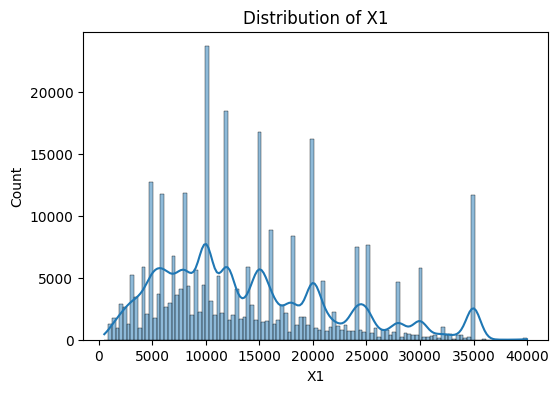

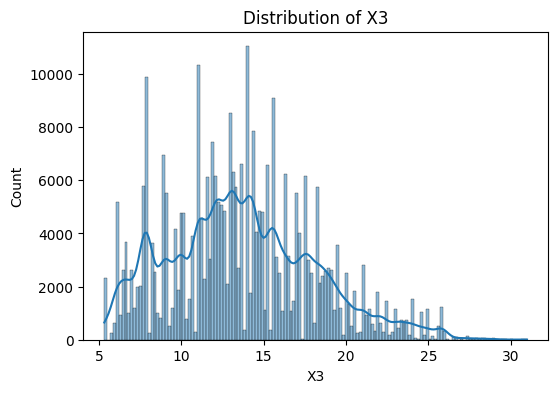

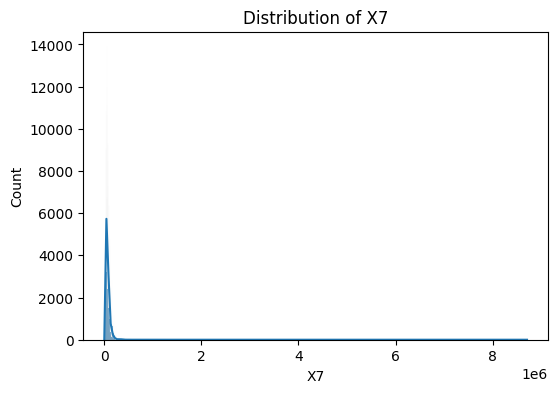

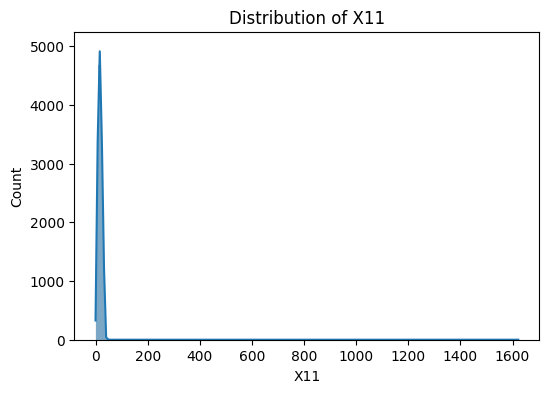

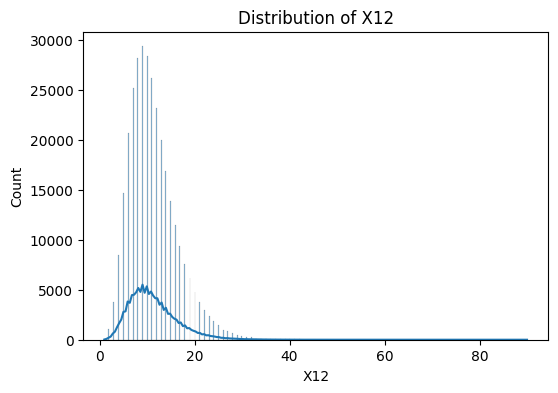

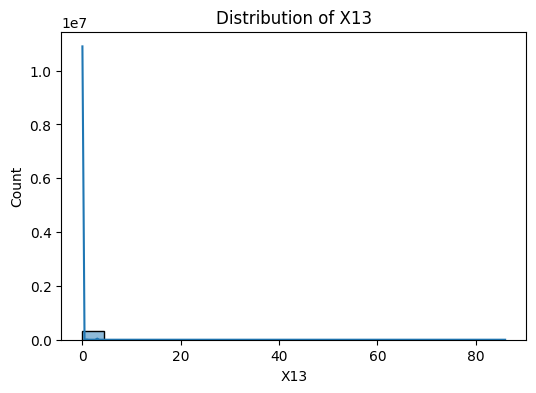

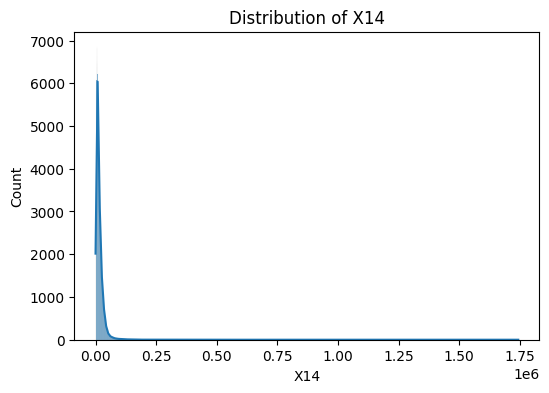

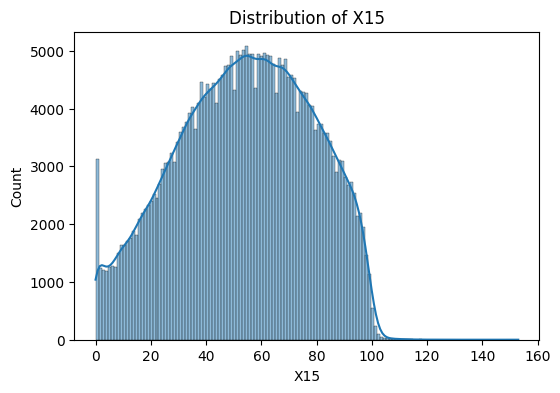

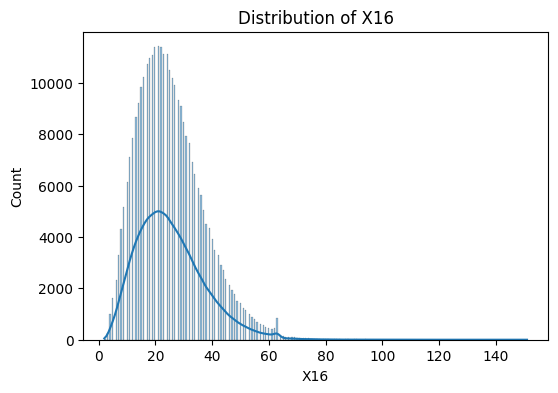

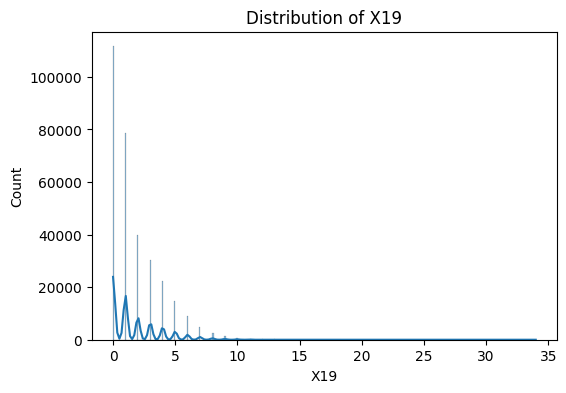

In [431]:
# Identify numerical columns
numerical_columns = ['X1', 'X3', 'X7', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X19']

# Visualize the distribution of each numerical feature
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

From the visualization, we can see that only X15 is quite normally distributed. We can check the skewness of each numerical feature as below:

In [432]:
numerical_columns = ['X1', 'X3', 'X7', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X19']

# Check skewness for numerical columns
for col in numerical_columns:
    skewness = train_df[col].skew()
    print(f"Skewness of {col}: {skewness}")

Skewness of X1: 0.7772913960442944
Skewness of X3: 0.419919416057423
Skewness of X7: 38.82903570645059
Skewness of X11: 20.642910244972025
Skewness of X12: 1.2227900390510942
Skewness of X13: 19.00685784081071
Skewness of X14: 11.949513450280044
Skewness of X15: -0.17405034587110707
Skewness of X16: 0.8661904462178057
Skewness of X19: 1.7709275954556483


Only the skewness of X15 is approximately 0, so it is nearly synmetric, and we will apply standardization (Z-Score Scaling). For all others, we will apply normalization (Min-Max Scaling).

In [433]:

skewed_columns = ['X1', 'X3', 'X7', 'X11', 'X12', 'X13', 'X14', 'X16', 'X19']  # Skewed columns
symmetric_columns = ['X15']  # Nearly symmetric columns

# Initialize scalers
min_max_scaler = MinMaxScaler()  # For skewed columns
standard_scaler = StandardScaler()  # For symmetric columns

# Apply Min-Max Scaling to skewed columns in the training dataset
train_df[skewed_columns] = min_max_scaler.fit_transform(train_df[skewed_columns])

# Apply the same scaling to the test dataset
test_df[skewed_columns] = min_max_scaler.transform(test_df[skewed_columns])

# Apply Standard Scaling to the symmetric column in the training dataset
train_df[symmetric_columns] = standard_scaler.fit_transform(train_df[symmetric_columns])

# Apply the same scaling to the test dataset
test_df[symmetric_columns] = standard_scaler.transform(test_df[symmetric_columns])

# Verify the scaled data
print("Scaled Training Dataset:")
print(train_df.head())

print("\nScaled Test Dataset:")
print(test_df.head())

Scaled Training Dataset:
       ID        X1        X3        X7       X11       X12       X13  \
0  256039  0.078481  0.079860  0.007053  0.002158  0.056180  0.000000   
1  176486  0.291139  0.435138  0.016357  0.008650  0.146067  0.011628   
2  392670  0.202532  0.240358  0.003032  0.000549  0.123596  0.000000   
3   46168  0.081646  0.220880  0.001644  0.019988  0.146067  0.000000   
4  313821  0.696203  0.393066  0.011417  0.006110  0.112360  0.011628   

        X14       X15       X16  ...  X10_h  X10_i  X10_j  X10_k  X10_l  \
0  0.003163 -1.403288  0.120805  ...  False  False  False  False  False   
1  0.003332  0.885016  0.228188  ...  False  False  False  False  False   
2  0.000258 -2.119662  0.134228  ...  False  False  False  False  False   
3  0.003761 -1.223171  0.161074  ...  False  False  False  False  False   
4  0.010038 -0.023756  0.181208  ...  False  False  False  False  False   

   X10_m  X10_n  X17_b  X18_b  X18_c  
0  False  False   True  False  False  
1  Fals

Now we gonna find outliers of numerical variables by using boxplots.

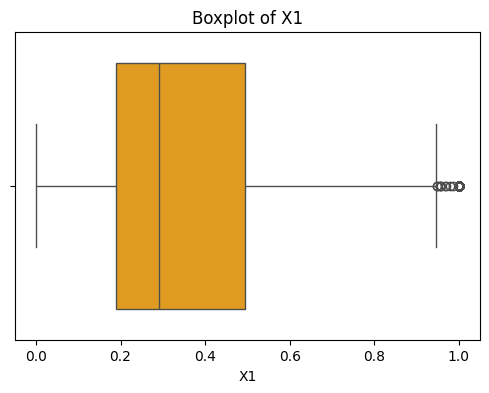

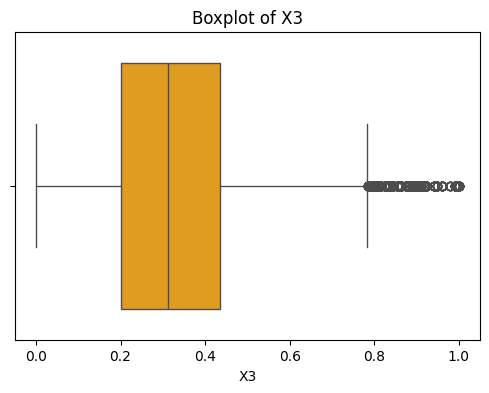

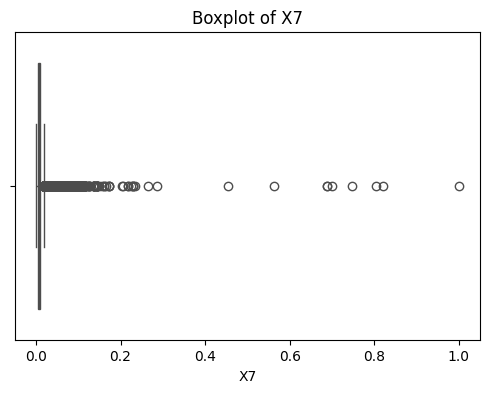

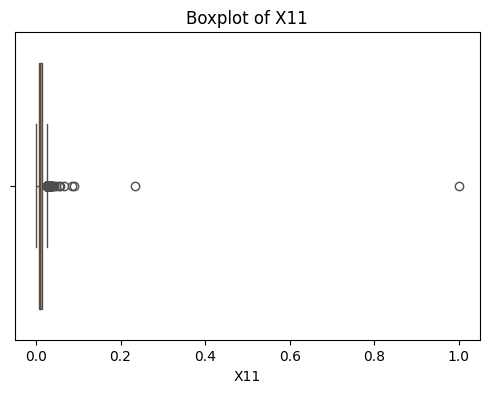

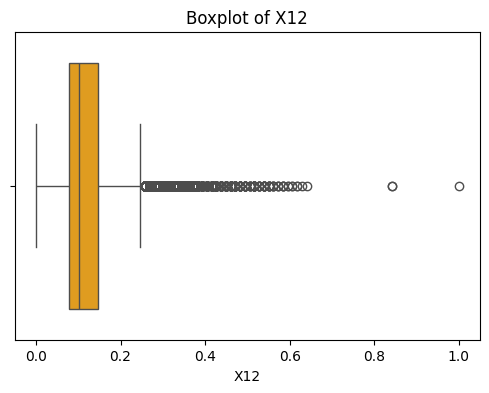

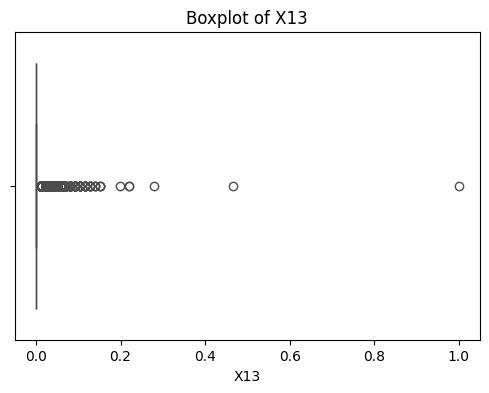

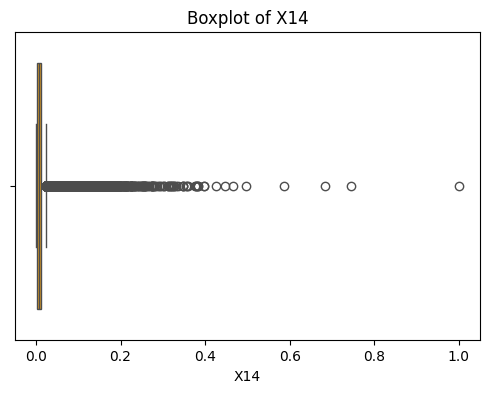

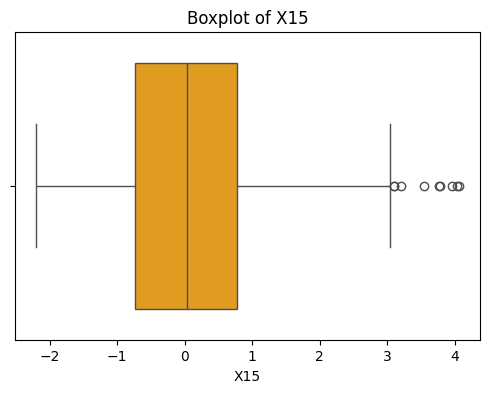

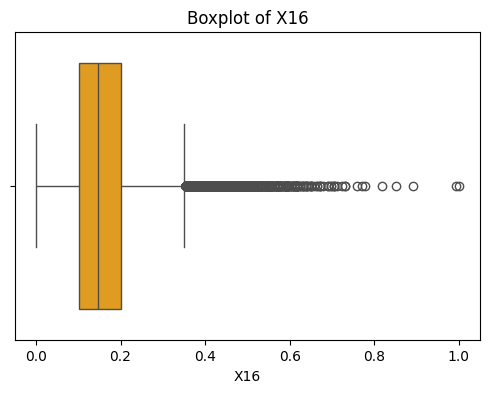

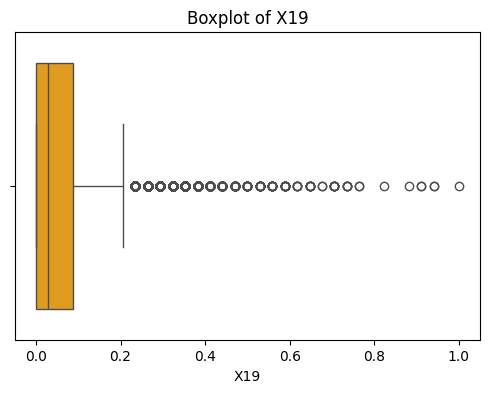

In [434]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train_df[col], color='orange')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

| Feature | Outliers       | Skewness         |Insight                                                                 |
|---------|----------------|------------------|-------------------------------------------------------------------------
| **X1**  | Mild           | Slightly Right   | Mostly compact values, a few high-end outliers. Consider capping outliers. |
| **X3**  | Moderate       | Right            | Similar to X1 but more outliers. Consider log-transform if used in sensitive models. |
| **X7**  | Extreme        | Strong Right     | Very high skew and extreme outliers. Needs transformation (e.g., log1p) or robust scaler. |
| **X11** | Extreme        | Strong Right     | Sparse values with distant outliers. Likely zero-inflated; transformation is essential. |
| **X12** | High           | Right            | Dense at low end, tapering off. Many outliers. Good candidate for log-transform or capping. |
| **X13** | Extreme        | Strong Right     | Strongly right-skewed with many extreme outliers; most values are near 0. Consider log transformation or scaling. |
| **X14** | Extreme        | Strong Right     | Compressed main distribution with extreme right outliers. Candidate for log-transform. |
| **X15** | Mild           | ~Symmetric       | Appears normally distributed post-standardization. No serious outliers — keep as is. |
| **X16** | High           | Right            | Long right tail with many outliers. Similar to X12 and X14; treat with log-transform or robust methods. |
| **X19** | Extreme        | Strong Right     | Severely skewed. Most data tightly packed near zero with long outlier tail. High risk of model distortion if untreated. |

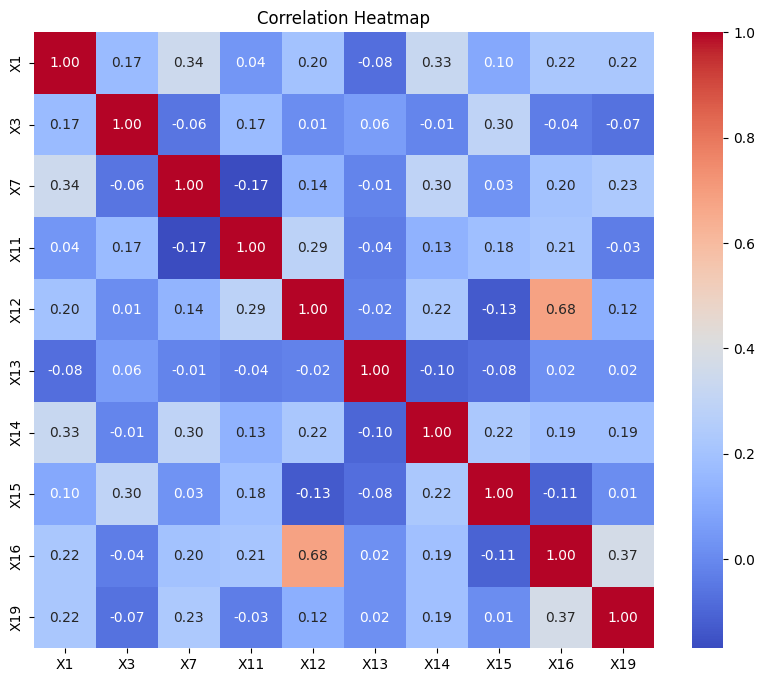

In [435]:
# Compute correlation matrix
correlation_matrix = train_df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

**Correlation Insights**

| **Pair**       | **Correlation** | **Insight**                                                                 |
|-----------------|-----------------|------------------------------------------------------------------------------|
| **X12 & X16**  | 0.68            | Strong positive correlation; may capture similar information.               |
| **X16 & X19**  | 0.37            | Moderate overlap; explore redundancy or complementary effects.              |
| **X1 & X7**    | 0.34            | Moderate overlap; possibly redundant or sequentially related values.        |
| **X1 & X14**   | 0.33            | Some shared signal; explore their individual predictive power.              |
| **X3 & X15**   | 0.30            | Possible trend overlap; could help ensemble methods.                        |
| **X7 & X14**   | 0.30            | Similar tail behavior; may be a proxy for intensity or magnitude.           |

---

**Negligible or Low Correlations**
- Most other values are in the range of **-0.2 to +0.2**, suggesting:
  - Weak linear relationships.
  - Potential non-linear influence (relevant for models like decision trees, XGBoost, or neural networks).

---

**No Strong Negative Correlations**
- No pair shows strong inverse correlation.

Before moving to test the model, we would want to see the distribution of target variable (Y).

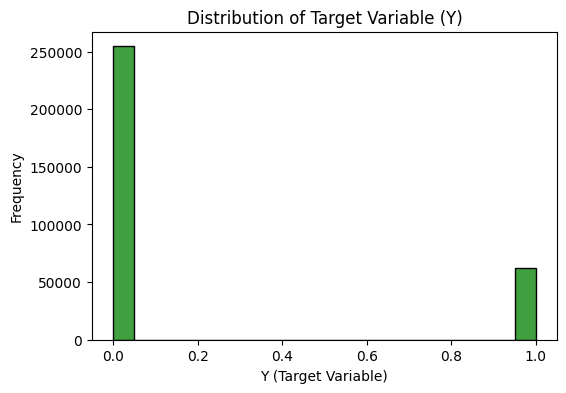

In [436]:
# Plot distribution of target variable
plt.figure(figsize=(6, 4))
sns.histplot(train_df['Y'], color='green')
plt.title("Distribution of Target Variable (Y)")
plt.xlabel("Y (Target Variable)")
plt.ylabel("Frequency")
plt.show()

In [437]:
count_y_1 = train_df[train_df['Y'] == 1].shape[0]
count_y_0 = train_df[train_df['Y'] == 0].shape[0]

print(f"Number of rows where Y = 1: {count_y_1}")
print(f"Number of rows where Y = 0: {count_y_0}")

Number of rows where Y = 1: 62083
Number of rows where Y = 0: 254511


It indicates that the target feature is imbalanced. Therefore, we need to apply more weight to the minority class (Y = 1) to ensure the model does not become biased toward the majority class (Y = 0).

In [438]:
# Split the data into training and cross-validation sets (42 is just a common choice)
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=42)

scale_pos_weight = count_y_0/count_y_1 # Ratio of majority to minority class

# Initialize the XGBoost Classifier
model = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation set
y_predictions = model.predict(X_cv)

# Evaluate the model
accuracy = accuracy_score(y_cv, y_predictions)
print("Validation Accuracy:", accuracy)

# Calculate F1-score
f1 = f1_score(y_cv, y_predictions)
print(f"F1-Score: {f1}")

# Print a detailed classification report
print("Classification Report:")
print(classification_report(y_cv, y_predictions))

Validation Accuracy: 0.6756265891754449
F1-Score: 0.44137405825876463
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.68      0.77     50753
           1       0.34      0.65      0.44     12566

    accuracy                           0.68     63319
   macro avg       0.61      0.66      0.61     63319
weighted avg       0.78      0.68      0.71     63319



In this case, the validation accuracy does not give much information, because even predicting all Y = 0 gives the accuracy of 254511/316594 $\approx$ 80%. Therefore, we should use F1-score instead, which is about 0.44.

In [439]:
# Ensure test_df has the same features as X_train
test_features = test_df.drop(columns=['Y'], errors='ignore')  # Drop 'Y'

# Make predictions on the test dataset
test_predictions = model.predict(test_features.drop(columns=['ID'], errors='ignore'))  # Exclude 'ID' for prediction

# Prepare the output DataFrame
output_df = pd.DataFrame({
    'ID': test_features['ID'],  # Use the original ID column from test.csv
    'Y': test_predictions       # Predicted values
})

# Sort the DataFrame by the ID column
output_df = output_df.sort_values(by='ID')

# Save the predictions to a new CSV file
output_df.to_csv('prediction.csv', index=False)

print("Predictions saved to 'prediction.csv'")

Predictions saved to 'prediction.csv'


In [440]:
pred_df = pd.read_csv('prediction.csv')
# Count the number of rows where Y = 1
count_y_1 = pred_df[pred_df['Y'] == 1].shape[0]

print(f"Number of rows where Y = 1: {count_y_1}")

Number of rows where Y = 1: 1105
